# Машинное обучение, ЭФ МГУ

## Практическое задание 2

### Формат сдачи
* Ноутбук Prac2_<Фамилия>_<Имя>.ipynb
* Модуль utils.py

In [573]:
import os
import time
from tqdm.notebook import tqdm
import itertools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [574]:
matplotlib.rcParams['figure.figsize'] = (8, 8)
sns.set_style('whitegrid')

In [575]:
# Если данной библиотеки нет - её надо установить (в терминале  pip install category_encoders==2.2.2)
# или в прямо в юпитер ноутбуке: !pip install category_encoders==2.2.2
import category_encoders
from category_encoders import TargetEncoder

In [186]:
category_encoders.__version__

'2.2.2'

In [576]:
# Вспомогательная функция для визуализации решающей поверхности модели
def plot_surface(clf: callable, X: np.array, y: np.array, **kwargs):
    
    """
    Args:
        clf: классификатор, у которого есть метод .predict()
        X: матрица Объект-Признак
        y: вектор классов
    """
    
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2, **kwargs)

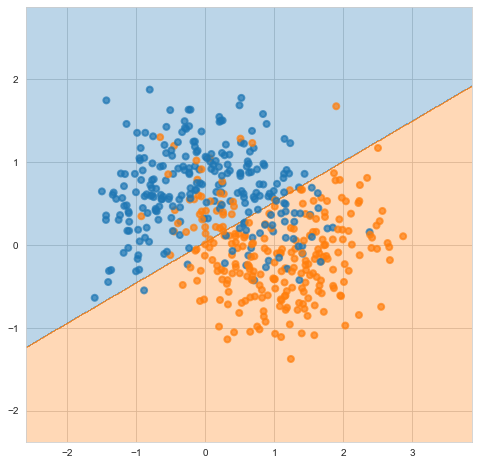

In [188]:
# Пример работы функции:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.4)
lr  = LogisticRegression().fit(X, y)
plot_surface(lr, X, y)

__Задание 1 (1 балл)__

Визуализируйте решающую поверхность дерева для выборки выше.

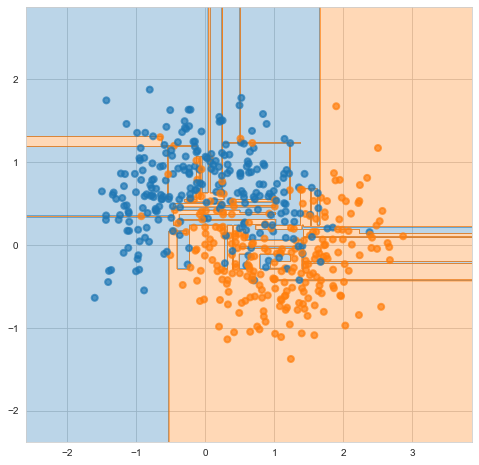

In [189]:
# Ваш код здесь:
dt = DecisionTreeClassifier().fit(X, y)
plot_surface(dt, X, y)

__Задание 2 (3 балла за график + 1 балл за ответ)__

Попробуйте перебрать несколько параметров для `max_depth` и `min_samples_leaf`. Для каждого набора гиперпараметров постройте разделяющую поверхность (на одной картинке сеткой), выведите обучающую и тестовую метрики качества (Accuracy). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит? 

In [190]:
from sklearn.metrics import accuracy_score

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle = True)

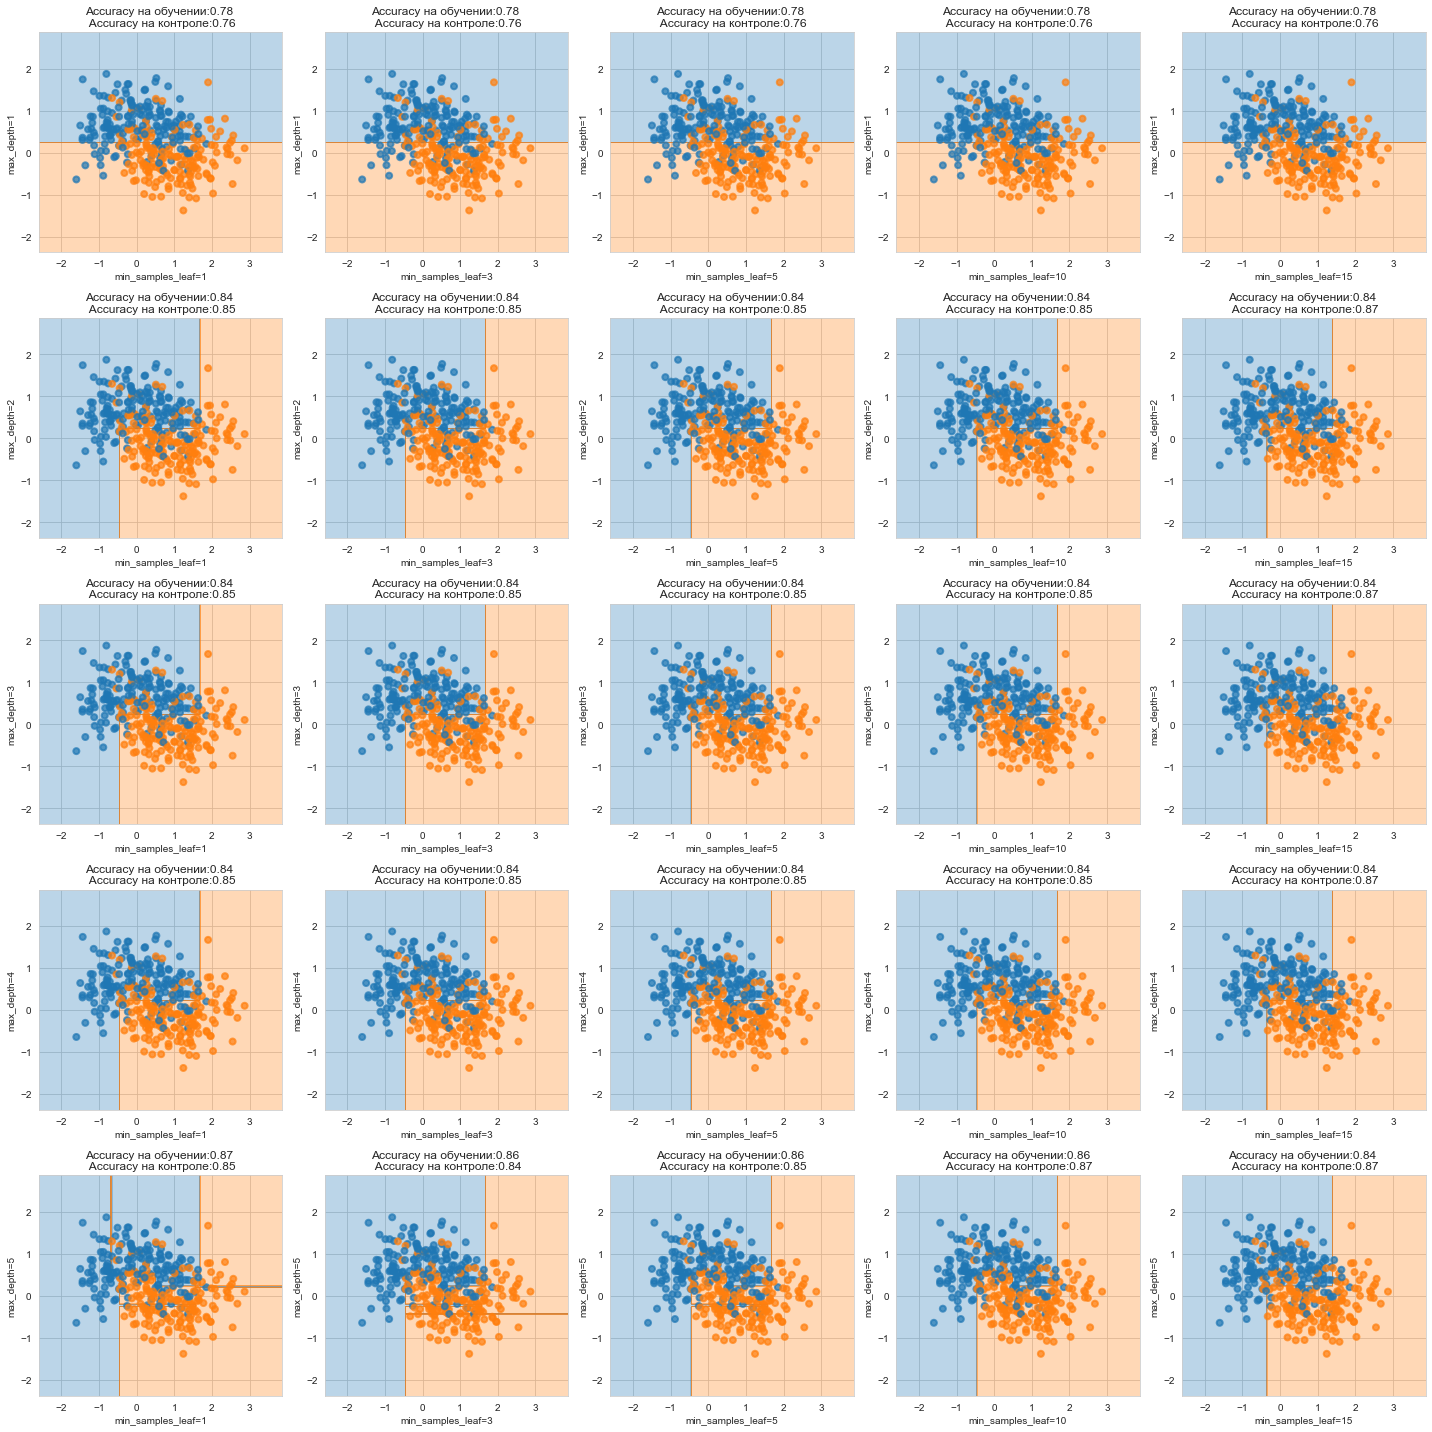

In [197]:
# Ваш код здесь:

plt.figure(figsize=(20,20))
# 1,1
max_depth = 1
min_samples_leaf = 1
plt.subplot(5, 5, 1)
dt = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
y_pred = dt.predict(X_test)
plot_surface(dt, X_train, y_train)
plt.yscale('linear')
plt.xlabel('min_samples_leaf={}'.format(min_samples_leaf))
plt.ylabel('max_depth={}'.format(max_depth))
actr = np.round(accuracy_score(y_train, dt.predict(X_train)),2)
acts = np.round(accuracy_score(y_test, y_pred),2)

plt.title('Accuracy на обучении:{} \n Accuracy на контроле:{}'.format(actr, acts))

# 1,3
max_depth = 1
min_samples_leaf = 3
plt.subplot(5, 5, 2)
dt = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
y_pred = dt.predict(X_test)
plot_surface(dt, X_train, y_train)
plt.yscale('linear')
plt.xlabel('min_samples_leaf={}'.format(min_samples_leaf))
plt.ylabel('max_depth={}'.format(max_depth))
actr = np.round(accuracy_score(y_train, dt.predict(X_train)),2)
acts = np.round(accuracy_score(y_test, y_pred),2)

plt.title('Accuracy на обучении:{} \n Accuracy на контроле:{}'.format(actr, acts))

# 1,5
max_depth = 1
min_samples_leaf = 5
plt.subplot(5, 5, 3)
dt = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
y_pred = dt.predict(X_test)
plot_surface(dt, X_train, y_train)
plt.yscale('linear')
plt.xlabel('min_samples_leaf={}'.format(min_samples_leaf))
plt.ylabel('max_depth={}'.format(max_depth))
actr = np.round(accuracy_score(y_train, dt.predict(X_train)),2)
acts = np.round(accuracy_score(y_test, y_pred),2)

plt.title('Accuracy на обучении:{} \n Accuracy на контроле:{}'.format(actr, acts))


max_depth = 1
min_samples_leaf = 10
plt.subplot(5, 5, 4)
dt = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
y_pred = dt.predict(X_test)
plot_surface(dt, X_train, y_train)
plt.yscale('linear')
plt.xlabel('min_samples_leaf={}'.format(min_samples_leaf))
plt.ylabel('max_depth={}'.format(max_depth))
actr = np.round(accuracy_score(y_train, dt.predict(X_train)),2)
acts = np.round(accuracy_score(y_test, y_pred),2)

plt.title('Accuracy на обучении:{} \n Accuracy на контроле:{}'.format(actr, acts))


max_depth = 1
min_samples_leaf = 15
plt.subplot(5, 5, 5)
dt = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
y_pred = dt.predict(X_test)
plot_surface(dt, X_train, y_train)
plt.yscale('linear')
plt.xlabel('min_samples_leaf={}'.format(min_samples_leaf))
plt.ylabel('max_depth={}'.format(max_depth))
actr = np.round(accuracy_score(y_train, dt.predict(X_train)),2)
acts = np.round(accuracy_score(y_test, y_pred),2)

plt.title('Accuracy на обучении:{} \n Accuracy на контроле:{}'.format(actr, acts))


max_depth = 2
min_samples_leaf = 1
plt.subplot(5, 5, 6)
dt = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
y_pred = dt.predict(X_test)
plot_surface(dt, X_train, y_train)
plt.yscale('linear')
plt.xlabel('min_samples_leaf={}'.format(min_samples_leaf))
plt.ylabel('max_depth={}'.format(max_depth))
actr = np.round(accuracy_score(y_train, dt.predict(X_train)),2)
acts = np.round(accuracy_score(y_test, y_pred),2)

plt.title('Accuracy на обучении:{} \n Accuracy на контроле:{}'.format(actr, acts))

max_depth = 2
min_samples_leaf = 3
plt.subplot(5, 5, 7)
dt = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
y_pred = dt.predict(X_test)
plot_surface(dt, X_train, y_train)
plt.yscale('linear')
plt.xlabel('min_samples_leaf={}'.format(min_samples_leaf))
plt.ylabel('max_depth={}'.format(max_depth))
actr = np.round(accuracy_score(y_train, dt.predict(X_train)),2)
acts = np.round(accuracy_score(y_test, y_pred),2)

plt.title('Accuracy на обучении:{} \n Accuracy на контроле:{}'.format(actr, acts))

max_depth = 2
min_samples_leaf = 5
plt.subplot(5, 5, 8)
dt = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
y_pred = dt.predict(X_test)
plot_surface(dt, X_train, y_train)
plt.yscale('linear')
plt.xlabel('min_samples_leaf={}'.format(min_samples_leaf))
plt.ylabel('max_depth={}'.format(max_depth))
actr = np.round(accuracy_score(y_train, dt.predict(X_train)),2)
acts = np.round(accuracy_score(y_test, y_pred),2)

plt.title('Accuracy на обучении:{} \n Accuracy на контроле:{}'.format(actr, acts))

max_depth = 2
min_samples_leaf = 10
plt.subplot(5, 5, 9)
dt = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
y_pred = dt.predict(X_test)
plot_surface(dt, X_train, y_train)
plt.yscale('linear')
plt.xlabel('min_samples_leaf={}'.format(min_samples_leaf))
plt.ylabel('max_depth={}'.format(max_depth))
actr = np.round(accuracy_score(y_train, dt.predict(X_train)),2)
acts = np.round(accuracy_score(y_test, y_pred),2)

plt.title('Accuracy на обучении:{} \n Accuracy на контроле:{}'.format(actr, acts))

max_depth = 2
min_samples_leaf = 15
plt.subplot(5, 5, 10)
dt = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
y_pred = dt.predict(X_test)
plot_surface(dt, X_train, y_train)
plt.yscale('linear')
plt.xlabel('min_samples_leaf={}'.format(min_samples_leaf))
plt.ylabel('max_depth={}'.format(max_depth))
actr = np.round(accuracy_score(y_train, dt.predict(X_train)),2)
acts = np.round(accuracy_score(y_test, y_pred),2)

plt.title('Accuracy на обучении:{} \n Accuracy на контроле:{}'.format(actr, acts))
max_depth = 3
min_samples_leaf = 1
plt.subplot(5, 5, 11)
dt = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
y_pred = dt.predict(X_test)
plot_surface(dt, X_train, y_train)
plt.yscale('linear')
plt.xlabel('min_samples_leaf={}'.format(min_samples_leaf))
plt.ylabel('max_depth={}'.format(max_depth))
actr = np.round(accuracy_score(y_train, dt.predict(X_train)),2)
acts = np.round(accuracy_score(y_test, y_pred),2)

plt.title('Accuracy на обучении:{} \n Accuracy на контроле:{}'.format(actr, acts))
max_depth = 3
min_samples_leaf = 3
plt.subplot(5, 5, 12)
dt = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
y_pred = dt.predict(X_test)
plot_surface(dt, X_train, y_train)
plt.yscale('linear')
plt.xlabel('min_samples_leaf={}'.format(min_samples_leaf))
plt.ylabel('max_depth={}'.format(max_depth))
actr = np.round(accuracy_score(y_train, dt.predict(X_train)),2)
acts = np.round(accuracy_score(y_test, y_pred),2)

plt.title('Accuracy на обучении:{} \n Accuracy на контроле:{}'.format(actr, acts))
max_depth = 3
min_samples_leaf = 5
plt.subplot(5, 5, 13)
dt = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
y_pred = dt.predict(X_test)
plot_surface(dt, X_train, y_train)
plt.yscale('linear')
plt.xlabel('min_samples_leaf={}'.format(min_samples_leaf))
plt.ylabel('max_depth={}'.format(max_depth))
actr = np.round(accuracy_score(y_train, dt.predict(X_train)),2)
acts = np.round(accuracy_score(y_test, y_pred),2)

plt.title('Accuracy на обучении:{} \n Accuracy на контроле:{}'.format(actr, acts))
max_depth = 3
min_samples_leaf = 10
plt.subplot(5, 5, 14)
dt = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
y_pred = dt.predict(X_test)
plot_surface(dt, X_train, y_train)
plt.yscale('linear')
plt.xlabel('min_samples_leaf={}'.format(min_samples_leaf))
plt.ylabel('max_depth={}'.format(max_depth))
actr = np.round(accuracy_score(y_train, dt.predict(X_train)),2)
acts = np.round(accuracy_score(y_test, y_pred),2)

plt.title('Accuracy на обучении:{} \n Accuracy на контроле:{}'.format(actr, acts))
max_depth = 3
min_samples_leaf = 15
plt.subplot(5, 5, 15)
dt = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
y_pred = dt.predict(X_test)
plot_surface(dt, X_train, y_train)
plt.yscale('linear')
plt.xlabel('min_samples_leaf={}'.format(min_samples_leaf))
plt.ylabel('max_depth={}'.format(max_depth))
actr = np.round(accuracy_score(y_train, dt.predict(X_train)),2)
acts = np.round(accuracy_score(y_test, y_pred),2)

plt.title('Accuracy на обучении:{} \n Accuracy на контроле:{}'.format(actr, acts))
max_depth = 4
min_samples_leaf = 1
plt.subplot(5, 5, 16)
dt = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
y_pred = dt.predict(X_test)
plot_surface(dt, X_train, y_train)
plt.yscale('linear')
plt.xlabel('min_samples_leaf={}'.format(min_samples_leaf))
plt.ylabel('max_depth={}'.format(max_depth))
actr = np.round(accuracy_score(y_train, dt.predict(X_train)),2)
acts = np.round(accuracy_score(y_test, y_pred),2)

plt.title('Accuracy на обучении:{} \n Accuracy на контроле:{}'.format(actr, acts))

max_depth = 4
min_samples_leaf = 3
plt.subplot(5, 5, 17)
dt = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
y_pred = dt.predict(X_test)
plot_surface(dt, X_train, y_train)
plt.yscale('linear')
plt.xlabel('min_samples_leaf={}'.format(min_samples_leaf))
plt.ylabel('max_depth={}'.format(max_depth))
actr = np.round(accuracy_score(y_train, dt.predict(X_train)),2)
acts = np.round(accuracy_score(y_test, y_pred),2)
plt.title('Accuracy на обучении:{} \n Accuracy на контроле:{}'.format(actr, acts))

max_depth = 4
min_samples_leaf = 5
plt.subplot(5, 5, 18)
dt = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
y_pred = dt.predict(X_test)
plot_surface(dt, X_train, y_train)
plt.yscale('linear')
plt.xlabel('min_samples_leaf={}'.format(min_samples_leaf))
plt.ylabel('max_depth={}'.format(max_depth))
actr = np.round(accuracy_score(y_train, dt.predict(X_train)),2)
acts = np.round(accuracy_score(y_test, y_pred),2)
plt.title('Accuracy на обучении:{} \n Accuracy на контроле:{}'.format(actr, acts))


max_depth = 4
min_samples_leaf = 10
plt.subplot(5, 5, 19)
dt = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
y_pred = dt.predict(X_test)
plot_surface(dt, X_train, y_train)
plt.yscale('linear')
plt.xlabel('min_samples_leaf={}'.format(min_samples_leaf))
plt.ylabel('max_depth={}'.format(max_depth))
actr = np.round(accuracy_score(y_train, dt.predict(X_train)),2)
acts = np.round(accuracy_score(y_test, y_pred),2)
plt.title('Accuracy на обучении:{} \n Accuracy на контроле:{}'.format(actr, acts))

max_depth = 4
min_samples_leaf = 15
plt.subplot(5, 5, 20)
dt = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
y_pred = dt.predict(X_test)
plot_surface(dt, X_train, y_train)
plt.yscale('linear')
plt.xlabel('min_samples_leaf={}'.format(min_samples_leaf))
plt.ylabel('max_depth={}'.format(max_depth))
actr = np.round(accuracy_score(y_train, dt.predict(X_train)),2)
acts = np.round(accuracy_score(y_test, y_pred),2)
plt.title('Accuracy на обучении:{} \n Accuracy на контроле:{}'.format(actr, acts))

max_depth = 5
min_samples_leaf = 1
plt.subplot(5, 5, 21)
dt = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
y_pred = dt.predict(X_test)
plot_surface(dt, X_train, y_train)
plt.yscale('linear')
plt.xlabel('min_samples_leaf={}'.format(min_samples_leaf))
plt.ylabel('max_depth={}'.format(max_depth))
actr = np.round(accuracy_score(y_train, dt.predict(X_train)),2)
acts = np.round(accuracy_score(y_test, y_pred),2)
plt.title('Accuracy на обучении:{} \n Accuracy на контроле:{}'.format(actr, acts))

max_depth = 5
min_samples_leaf = 3
plt.subplot(5, 5, 22)
dt = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
y_pred = dt.predict(X_test)
plot_surface(dt, X_train, y_train)
plt.yscale('linear')
plt.xlabel('min_samples_leaf={}'.format(min_samples_leaf))
plt.ylabel('max_depth={}'.format(max_depth))
actr = np.round(accuracy_score(y_train, dt.predict(X_train)),2)
acts = np.round(accuracy_score(y_test, y_pred),2)
plt.title('Accuracy на обучении:{} \n Accuracy на контроле:{}'.format(actr, acts))

max_depth = 5
min_samples_leaf = 5
plt.subplot(5, 5, 23)
dt = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
y_pred = dt.predict(X_test)
plot_surface(dt, X_train, y_train)
plt.yscale('linear')
plt.xlabel('min_samples_leaf={}'.format(min_samples_leaf))
plt.ylabel('max_depth={}'.format(max_depth))
actr = np.round(accuracy_score(y_train, dt.predict(X_train)),2)
acts = np.round(accuracy_score(y_test, y_pred),2)
plt.title('Accuracy на обучении:{} \n Accuracy на контроле:{}'.format(actr, acts))

max_depth = 5
min_samples_leaf = 10
plt.subplot(5, 5, 24)
dt = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
y_pred = dt.predict(X_test)
plot_surface(dt, X_train, y_train)
plt.yscale('linear')
plt.xlabel('min_samples_leaf={}'.format(min_samples_leaf))
plt.ylabel('max_depth={}'.format(max_depth))
actr = np.round(accuracy_score(y_train, dt.predict(X_train)),2)
acts = np.round(accuracy_score(y_test, y_pred),2)
plt.title('Accuracy на обучении:{} \n Accuracy на контроле:{}'.format(actr, acts))

max_depth = 5
min_samples_leaf = 15
plt.subplot(5, 5, 25)
dt = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
y_pred = dt.predict(X_test)
plot_surface(dt, X_train, y_train)
plt.yscale('linear')
plt.xlabel('min_samples_leaf={}'.format(min_samples_leaf))
plt.ylabel('max_depth={}'.format(max_depth))
actr = np.round(accuracy_score(y_train, dt.predict(X_train)),2)
acts = np.round(accuracy_score(y_test, y_pred),2)
plt.title('Accuracy на обучении:{} \n Accuracy на контроле:{}'.format(actr, acts))

plt.tight_layout()
plt.show()


# plt.figure(figsize=(20,20))
# # Ваш код здесь:
# max_depths = [1,2,3,4,5]
# min_samples_leafs = [1,3,5,10,15]
# fig, axes = plt.subplots(5, 5, sharex=True, figsize=(12,6))


# i = 0
# for max_depth in max_depths:
#     for min_samples_leaf in min_samples_leafs:
#         dt = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
#         y_pred = dt.predict(X_test)
#         plot_surface(dt, X_train, y_train)
#         plt.yscale('linear')
#         plt.xlabel('min_samples_leaf={}'.format(min_samples_leaf))
#         plt.ylabel('max_depth={}'.format(max_depth))
#         actr = np.round(accuracy_score(y_train, dt.predict(X_train)),2)
#         acts = np.round(accuracy_score(y_test, y_pred),2)
#         axes[np.unravel_index(i, (5, 5))].set_title('Accuracy на обучении:{} \n Accuracy на контроле:{}'.format(actr, acts))
#         i=i+1

__Ответ:__

Дело в том, как мы определяем гиперпараметры: глубина дерева позволяет добиваться "вырезов", так как больше делений, а показатель min_samples_leaf
отвечает за то, сколько минимум должно быть объектов в листе чтобы дерево смогло разделиться, поэтому где этот показатель больше, наблюдается 
также меньшая "изрезанность" дерева, но уже по другой причине
    

### Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3 (2 балла)__

Реализуйте функцию подсчёта impurity листа (compute_criterion) и сохраните её в utils.py

In [81]:
from utils import compute_criterion

In [82]:
print('Gini:', compute_criterion(target_vector=np.array([1, 1, 1, 2, 2, 2, 3, 3, 3]), 
                                 feature_vector=np.arange(9), 
                                 threshold=4, 
                                 criterion='gini'))
print('Entropy:', compute_criterion(target_vector=np.array([1, 1, 1, 2, 2, 2, 3, 3, 3]), 
                                    feature_vector=np.arange(9), 
                                    threshold=4, 
                                    criterion='entropy'))

Gini: 0.23333333333333345
Entropy: 0.6849774484867257


__Задание 4 (3 балла)__

Реализуйте функцию find_best_split из модуля utils.py

In [17]:
# Предполагается, что вы реализуете эту функцию и запишите её в utils.py
from utils import find_best_split

In [233]:
find_best_split(feature_vector=np.arange(9), target_vector=np.array([1, 1, 1, 2, 2, 2, 3, 3, 3]), criterion = 'gini')


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [0.08333333333333348,
  0.19047619047619063,
  0.3333333333333334,
  0.23333333333333345,
  0.23333333333333342,
  0.3333333333333334,
  0.19047619047619063,
  0.08333333333333348],
 2.5,
 0.3333333333333334)

__Задание 5 (2 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)) (Этот датасет есть по пути: "./data/students.csv"). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одной картинке 5 графиков (сеткой по признакам): распределение j-ого признака при целевой переменной равной 0 и 1 (2 плотности распределения на одном графике).

In [448]:
# Загружаем данные
tmp_df = pd.read_csv('./data/students.csv')
tmp_df.columns = [col.strip() for col in tmp_df.columns]

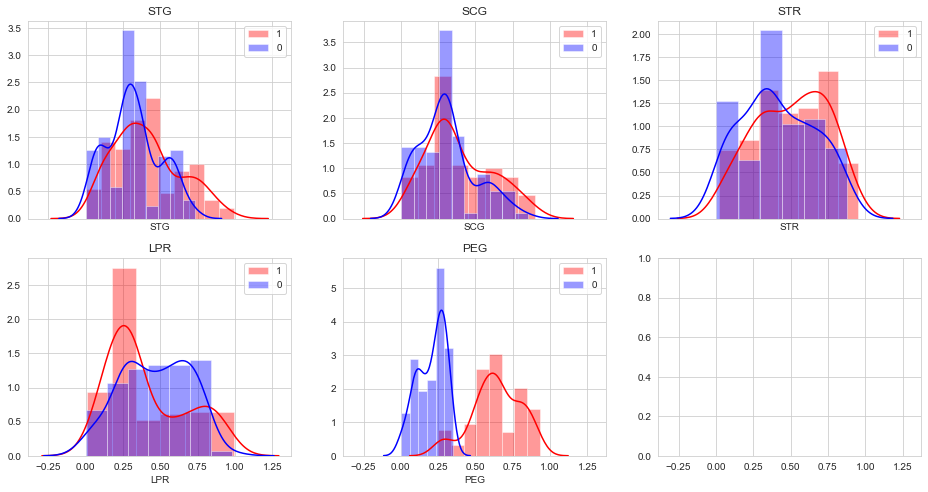

In [179]:
# Ваш код здесь:
features = ['STG', 'SCG', 'STR', 'LPR', 'PEG']
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(16,8))

for i in range(0,5):
    sns.distplot(a = tmp_df[tmp_df['UNS'] == 1][features[i]], color='red', ax=axes[np.unravel_index(i, (2, 3))[0], np.unravel_index(i, (2, 3))[1]], label = "1")
    sns.distplot(a = tmp_df[tmp_df['UNS'] == 0][features[i]], color='blue', ax=axes[np.unravel_index(i, (2, 3))[0], np.unravel_index(i, (2, 3))[1]], label = "0")
    axes[np.unravel_index(i, (2, 3))].set_title(features[i])
    axes[np.unravel_index(i, (2, 3))].legend()


__Задание 6 (2 балла за график + 1 балл за ответ)__

Изобразите на одном графике значения критерий расщипления Джини для каждой переменной (своим цветом для каждой переменной). По какой переменной лучше всего провести первое разбиение? Совпадает ли вывод про лучшую переменную для разбиения из этого графика, с выводом, полученным из графика в задании 5?

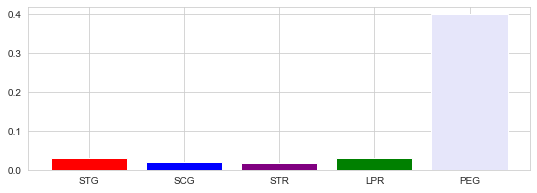

In [22]:
# Ваш код здесь:
names = ['STG', 'SCG', 'STR', 'LPR', 'PEG']
values = [find_best_split(tmp_df['STG'], tmp_df['UNS'], criterion='gini')[3], 
          find_best_split(tmp_df['SCG'], tmp_df['UNS'], criterion='gini')[3],
          find_best_split(tmp_df['STR'], tmp_df['UNS'], criterion='gini')[3],
          find_best_split(tmp_df['LPR'], tmp_df['UNS'], criterion='gini')[3],
          find_best_split(tmp_df['PEG'], tmp_df['UNS'], criterion='gini')[3]]

plt.figure(figsize=(9, 3))
plt.bar(names, values, color=['red', 'blue', 'purple', 'green', 'lavender'])

plt.show() 




__Ответ:__

Согласно полученным результатам лучше всего делать разделение по переменной PEG, 
так как в этом случае имеем наибольшее значение best_criterion.
Это согласуется с графическими результатами из задания 5, так как визуально понятно, что проще всего сделать
разделение именно между распределениями значение PEG соответствующим нулю и единице значения UNS (соответствующие
распределения звметно отстоят друг от друга)

__Задание 7 (1 балл)__

Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

__Ответ:__

Для хороших признаков должно быть чётко заметно визуальная возможность разделения переменной соответствующей разным значениям
целевой переменной (два отдельно стоящих холма), тогда как для плохих признаков распределения для тагргета 0 и 1 совпадают, поэтому 
невозможно провести разделение

In [205]:
from utils import find_best_split

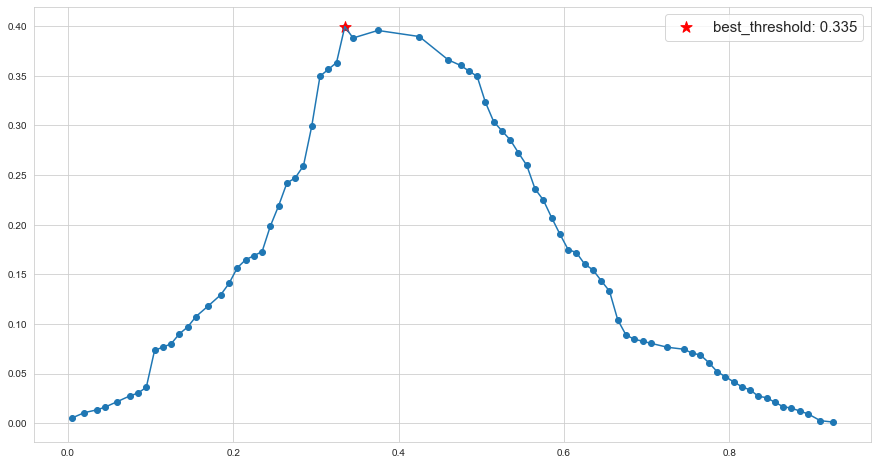

In [232]:
thresholds, criterions, best_threshold, best_crit = find_best_split(
    feature_vector=tmp_df['PEG'], 
    target_vector=tmp_df['UNS'], 
    criterion='gini'
)


plt.figure(figsize=(15, 8))
plt.plot(thresholds, criterions)
plt.scatter(thresholds, criterions)
plt.scatter(best_threshold, best_crit, color='red', s=140, marker='*', 
            label=f'best_threshold: {round(best_threshold, 3)}');
plt.legend(fontsize=15);

**Ответ:**

выше

__Задание 8 (4 балла)__

Разберитесь с уже написанным кодом в классе DecisionTree модуля utils.py. Найдите ошибки в реализации метода \_fit_node, исправьте их.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини или Энтропийному критерию. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется target_encoding преобразование.

In [721]:
from utils import DecisionTree

Проверка, что Ваш код не падает:

In [695]:
model = DecisionTree(feature_types=['real']*(tmp_df.shape[1] - 1), criterion='gini')
model.fit(tmp_df.drop(['UNS'], axis=1).values, tmp_df['UNS'].values)

model = DecisionTree(feature_types=['categorical']*(tmp_df.shape[1] - 1), criterion='gini')
model.fit(tmp_df.drop(['UNS'], axis=1).values, tmp_df['UNS'].values)

И в результате что-то обучилось:

In [698]:
model._tree

{'type': 'nonterminal',
 'feature_type': 'real',
 'feature_number': 4,
 'threshold': 0.335,
 'left_child': {'type': 'nonterminal',
  'feature_type': 'real',
  'feature_number': 3,
  'threshold': 0.79,
  'left_child': {'type': 'nonterminal',
   'feature_type': 'real',
   'feature_number': 0,
   'threshold': 0.75,
   'left_child': {'type': 'nonterminal',
    'feature_type': 'real',
    'feature_number': 1,
    'threshold': 0.615,
    'left_child': {'type': 'nonterminal',
     'feature_type': 'real',
     'feature_number': 0,
     'threshold': 0.19,
     'left_child': {'type': 'nonterminal',
      'feature_type': 'real',
      'feature_number': 0,
      'threshold': 0.16499999999999998,
      'left_child': {'type': 'nonterminal',
       'feature_type': 'real',
       'feature_number': 4,
       'threshold': 0.295,
       'left_child': {'type': 'terminal', 'class': 0},
       'right_child': {'type': 'nonterminal',
        'feature_type': 'real',
        'feature_number': 3,
        'thresh

__Задание 9 (3 балла)__

Реализуйте метод _predict_node в utils.py

In [827]:
 from utils import DecisionTree

Проверка, что метод реализован правильно и не падает:

In [481]:
model = DecisionTree(feature_types=['real']*(tmp_df.shape[1] - 1), criterion='gini')
model.fit(tmp_df.drop(['UNS'], axis=1).values, tmp_df['UNS'].values)

model.predict(tmp_df.drop(['UNS'], axis=1).values)

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

__Задание 10 (1 балл)__

Обучите дерево на признаках LPR и PEG и визуализируйте полученную модель с помощью plot_surface

Text(0, 0.5, 'PEG')

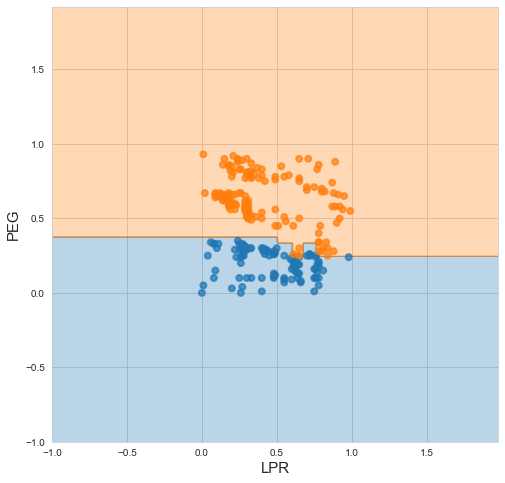

In [617]:
# Ваш код здесь:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 

model = DecisionTree(feature_types=['real']*(tmp_df.shape[1] - 4), criterion='gini')
model.fit(tmp_df.drop(['UNS', 'STR', 'SCG', 'STG'], axis=1).values, tmp_df['UNS'].values)
plot_surface(model, tmp_df.drop(['UNS', 'STR', 'SCG', 'STG'], axis=1).values, tmp_df['UNS'].values)
plt.xlabel('LPR',fontsize=15)
plt.ylabel('PEG',fontsize=15)

__Задание 11 (2 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)) (этот датасет доступен по пути "./data/agaricus-lepiota.data"), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [851]:
from utils import DecisionTree

In [832]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [900]:
# Загружаем данные
mush_df = pd.read_csv('./data/agaricus-lepiota.data', header=None)

# Делаем маппинг таргетов
mush_target = mush_df[0].map({'e': 0, 'p': 1}).values
mush_X = mush_df.drop([0], axis=1)

# Делаем Label encoding для столбцов:
mush_X = mush_X.apply(LabelEncoder().fit_transform)

In [859]:
tr_idx, te_idx = np.array_split(np.random.RandomState(seed=19).permutation(len(mush_X)), 2)
# Ваш код здесь:
X_train, X_test = mush_X.iloc[tr_idx,:], mush_X.iloc[te_idx,:]
y_train, y_test = mush_df.iloc[tr_idx,:][0].map({'e': 0, 'p': 1}), mush_df.iloc[te_idx,:][0].map({'e': 0, 'p': 1})

model = DecisionTree(feature_types=['categorical']*(X_train.shape[1]), criterion='gini')
model.fit(X_train.values, y_train.values)
y_pred_test = model.predict(X_test.values)
y_pred_train = model.predict(X_train.values)

print('Accuracy на обучении:', 
      # Ваш код здесь:
      sum(y_pred_train == y_train)/len(y_pred_train)
     )
print('Accuracy на контроле:', 
      # Ваш код здесь:
      sum(y_pred_test == y_test)/len(y_pred_test)
     )

Accuracy на обучении: 1.0
Accuracy на контроле: 0.999015263417036


__Бонусное задание (3 балла (по одному за каждый параметр) + 3 балла (по одному за каждый график))__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 12 (4 балла)__

Загрузите следующие наборы данных (Они доступны в "./data/") (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (они записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью кросс-валидации (число фолдов = 10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Для первых 3х алгоритмов рекомендуется использовать метод .cv_result

In [893]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

In [1114]:
%%time

datasets_dict = {
    'mushrooms': pd.read_csv('./data/agaricus-lepiota.data', header=None),
    'tic_tac': pd.read_csv('./data/tic-tac-toe.data', header=None),
    'cars': pd.read_csv('./data/car.data', header=None),
    'nursery': pd.read_csv('./data/nursery.data', header=None)
}

# Датафрейм в котором будут собираться результаты по метрике
results_df = pd.DataFrame([], index=[key for key in datasets_dict.keys()], 
                          columns=['DT real', 'DT categorical', 'DT real + OHE', 'DT sklearn'])

# Ваш код здесь:

#mushrooms
mushrooms = datasets_dict['mushrooms']
# Делаем маппинг таргетов
mush_target = mushrooms[0].map({'e': 0, 'p': 1}).values
mush_X = mushrooms.drop([0], axis=1)

mush_X_label = mush_X.apply(LabelEncoder().fit_transform)
mush_X_ohe = pd.get_dummies(mush_X)

tr_idx, te_idx = np.array_split(np.random.RandomState(seed=19).permutation(len(mush_X)), 2)
# Ваш код здесь:
# label encoding
X_train_label, X_test_label = mush_X_label.iloc[tr_idx,:], mush_X_label.iloc[te_idx,:]
y_train_label, y_test_label = mushrooms.iloc[tr_idx,:][0].map({'e': 0, 'p': 1}), mushrooms.iloc[te_idx,:][0].map({'e': 0, 'p': 1})

# ohe
X_train_ohe, X_test_ohe = mush_X_ohe.iloc[tr_idx,:], mush_X_ohe.iloc[te_idx,:]
y_train_ohe, y_test_ohe = mushrooms.iloc[tr_idx,:][0].map({'e': 0, 'p': 1}), mushrooms.iloc[te_idx,:][0].map({'e': 0, 'p': 1})

# real + label
model = DecisionTree(feature_types=['real']*(X_train_label.shape[1]), criterion='gini')
model.fit(X_train_label.values, y_train_label.values)
mush_real_label_acc = np.mean(model.cv_result(X_train_label.values, y_train_label.values))

# categorical + label
model_cat = DecisionTree(feature_types=['categorical']*(X_train_label.shape[1]), criterion='gini')
model_cat.fit(X_train_label.values, y_train_label.values)
mush_cat_label_acc = np.mean(model.cv_result(X_train_label.values, y_train_label.values))

# real + ohe
model = DecisionTree(feature_types=['real']*(X_train_ohe.shape[1]), criterion='gini')
model.fit(X_train_ohe.values, y_train_ohe.values)
mush_real_ohe_acc = np.mean(model.cv_result(X_train_ohe.values, y_train_ohe.values))

results_df.loc['mushrooms', 'DT real'] = np.round(mush_real_label_acc, 4)
results_df.loc['mushrooms', 'DT categorical'] = np.round(mush_cat_label_acc, 4)
results_df.loc['mushrooms', 'DT real + OHE'] = np.round(mush_real_ohe_acc, 4)



#tic_tac
tic_tac = datasets_dict['tic_tac']
# Делаем маппинг таргетов
tic_tac_target = tic_tac[9].map({'positive': 1, 'negative': 0}).values
tic_tac_X = tic_tac.drop([9], axis=1)

tic_tac_X = tic_tac_X.apply(LabelEncoder().fit_transform)
tic_tac_X_ohe = pd.get_dummies(tic_tac_X)

tr_idx, te_idx = np.array_split(np.random.RandomState(seed=19).permutation(len(tic_tac_X)), 2)
# Ваш код здесь:
# label encoding
X_train_label, X_test_label = tic_tac_X.iloc[tr_idx,:], tic_tac_X.iloc[te_idx,:]
y_train_label, y_test_label = tic_tac.iloc[tr_idx,:][9].map({'positive': 1, 'negative': 0}), tic_tac.iloc[te_idx,:][9].map({'positive': 1, 'negative': 0})

# ohe
X_train_ohe, X_test_ohe = tic_tac_X_ohe.iloc[tr_idx,:], tic_tac_X_ohe.iloc[te_idx,:]
y_train_ohe, y_test_ohe = tic_tac.iloc[tr_idx,:][9].map({'positive': 1, 'negative': 0}), tic_tac.iloc[te_idx,:][9].map({'positive': 1, 'negative': 0})



# real + label
model = DecisionTree(feature_types=['real']*(X_train_label.shape[1]), criterion='gini')
model.fit(X_train_label.values, y_train_label.values)
tic_tac_real_label_acc = np.mean(model.cv_result(X_train_label.values, y_train_label.values))

# categorical + label
model_cat = DecisionTree(feature_types=['categorical']*(X_train.shape[1]), criterion='gini')
model_cat.fit(X_train.values, y_train.values)
tic_tac_cat_label_acc = np.mean(model.cv_result(X_train_label.values, y_train_label.values))

# real + ohe
model_cat = DecisionTree(feature_types=['real']*(X_train_ohe.shape[1]), criterion='gini')
model_cat.fit(X_train_ohe.values, y_train_ohe.values)
tic_tac_real_ohe_acc = np.mean(model.cv_result(X_train_ohe.values, y_train_ohe.values))

results_df.loc['tic_tac', 'DT real'] = np.round(tic_tac_real_label_acc, 4)
results_df.loc['tic_tac', 'DT categorical'] = np.round(tic_tac_cat_label_acc, 4)
results_df.loc['tic_tac', 'DT real + OHE'] = np.round(tic_tac_real_ohe_acc, 4)


#cars
cars = datasets_dict['cars']
# Делаем маппинг таргетов
cars_target = cars[6].map({'unacc': 0, 'acc': 0, 'good':1, 'vgood':1}).values
cars_X = cars.drop([6], axis=1)

cars_X_label = cars_X.apply(LabelEncoder().fit_transform)
cars_X_ohe = pd.get_dummies(cars_X)

tr_idx, te_idx = np.array_split(np.random.RandomState(seed=19).permutation(len(cars_X)), 2)
# Ваш код здесь:
# label encoding
X_train_label, X_test_label = cars_X_label.iloc[tr_idx,:], cars_X_label.iloc[te_idx,:]
y_train_label, y_test_label = cars.iloc[tr_idx,:][6].map({'unacc': 0, 'acc': 0, 'good':1, 'vgood':1}), cars.iloc[te_idx,:][6].map({'unacc': 0, 'acc': 0, 'good':1, 'vgood':1})

# ohe
X_train_ohe, X_test_ohe = cars_X_ohe.iloc[tr_idx,:], cars_X_ohe.iloc[te_idx,:]
y_train_ohe, y_test_ohe = cars.iloc[tr_idx,:][6].map({'unacc': 0, 'acc': 0, 'good':1, 'vgood':1}), cars.iloc[te_idx,:][6].map({'unacc': 0, 'acc': 0, 'good':1, 'vgood':1})

# real + label
model = DecisionTree(feature_types=['real']*(X_train_label.shape[1]), criterion='gini')
model.fit(X_train_label.values, y_train_label.values)
cars_real_label_acc = np.mean(model.cv_result(X_train_label.values, y_train_label.values))

# categorical + label
model_cat = DecisionTree(feature_types=['categorical']*(X_train_label.shape[1]), criterion='gini')
model_cat.fit(X_train_label.values, y_train_label.values)
cars_cat_label_acc = np.mean(model.cv_result(X_train_label.values, y_train_label.values))

# real + ohe
model = DecisionTree(feature_types=['real']*(X_train_ohe.shape[1]), criterion='gini')
model.fit(X_train_ohe.values, y_train_ohe.values)
cars_real_ohe_acc = np.mean(model.cv_result(X_train_ohe.values, y_train_ohe.values))

results_df.loc['cars', 'DT real'] = np.round(cars_real_label_acc, 4)
results_df.loc['cars', 'DT categorical'] = np.round(cars_cat_label_acc, 4)
results_df.loc['cars', 'DT real + OHE'] = np.round(cars_real_ohe_acc, 4)

#nursery
nursery = datasets_dict['nursery']
# Делаем маппинг таргетов
nursery_target = nursery[8].map({'not_recom': 0, 'recommend': 0, 'priority':1, 'spec_prior':1, 'very_recom':1}).values
nursery_X = nursery.drop([8], axis=1)

nursery_X_label = nursery_X.apply(LabelEncoder().fit_transform)
nursery_X_ohe = pd.get_dummies(nursery_X)

tr_idx, te_idx = np.array_split(np.random.RandomState(seed=19).permutation(len(nursery_X)), 2)
# Ваш код здесь:
# label encoding
X_train_label, X_test_label = nursery_X_label.iloc[tr_idx,:], nursery_X_label.iloc[te_idx,:]
y_train_label, y_test_label = nursery.iloc[tr_idx,:][8].map({'not_recom': 0, 'recommend': 0, 'priority':1, 'spec_prior':1, 'very_recom':1}), nursery.iloc[te_idx,:][8].map({'not_recom': 0, 'recommend': 0, 'priority':1, 'spec_prior':1, 'very_recom':1})

# ohe
X_train_ohe, X_test_ohe = nursery_X_ohe.iloc[tr_idx,:], nursery_X_ohe.iloc[te_idx,:]
y_train_ohe, y_test_ohe = nursery.iloc[tr_idx,:][8].map({'not_recom': 0, 'recommend': 0, 'priority':1, 'spec_prior':1, 'very_recom':1}), nursery.iloc[te_idx,:][8].map({'not_recom': 0, 'recommend': 0, 'priority':1, 'spec_prior':1, 'very_recom':1})

# real + label
model = DecisionTree(feature_types=['real']*(X_train_label.shape[1]), criterion='gini')
model.fit(X_train_label.values, y_train_label.values)
nursery_real_label_acc = np.mean(model.cv_result(X_train_label.values, y_train_label.values))

# categorical + label
model_cat = DecisionTree(feature_types=['categorical']*(X_train_label.shape[1]), criterion='gini')
model_cat.fit(X_train_label.values, y_train_label.values)
nursery_cat_label_acc = np.mean(model.cv_result(X_train_label.values, y_train_label.values))

# real + ohe
model = DecisionTree(feature_types=['real']*(X_train_ohe.shape[1]), criterion='gini')
model.fit(X_train_ohe.values, y_train_ohe.values)
nursery_real_ohe_acc = np.mean(model.cv_result(X_train_ohe.values, y_train_ohe.values))

results_df.loc['nursery', 'DT real'] = np.round(nursery_real_label_acc, 4)
results_df.loc['nursery', 'DT categorical'] = np.round(nursery_cat_label_acc, 4)
results_df.loc['nursery', 'DT real + OHE'] = np.round(nursery_real_ohe_acc, 4)




#DT+real
mush_df = datasets_dict['mushrooms']

# Делаем маппинг таргетов
mush_target = mush_df[0].map({'e': 0, 'p': 1}).values
mush_X = mush_df.drop([0], axis=1)

# Делаем Label encoding для столбцов:
mush_X = mush_X.apply(LabelEncoder().fit_transform)

dt = DecisionTreeClassifier()
acc_dt = np.round(np.mean(cross_val_score(dt, mush_X, mush_target, cv = 5, scoring = 'accuracy')), 4)

results_df.loc['mushrooms', 'DT sklearn'] = acc_dt

#DT+real
tic_tac = datasets_dict['tic_tac']

# Делаем маппинг таргетов
tic_tac_target = tic_tac[9].map({'negative': 0, 'positive': 1}).values
tic_tac_X = tic_tac.drop([9], axis=1)

# Делаем Label encoding для столбцов:
tic_tac_X = tic_tac_X.apply(LabelEncoder().fit_transform)


dt = DecisionTreeClassifier()
acc_dt = np.round(np.mean(cross_val_score(dt, tic_tac_X, tic_tac_target, cv = 5, scoring = 'accuracy')), 4)

results_df.loc['tic_tac', 'DT sklearn'] = acc_dt

#DT+real
cars = datasets_dict['cars']

# Делаем маппинг таргетов
cars_target = cars[6].map({'unacc': 0, 'acc': 0, 'good':1, 'vgood':1}).values
cars_X = cars.drop([6], axis=1)

# Делаем Label encoding для столбцов:
cars_X = cars_X.apply(LabelEncoder().fit_transform)


dt = DecisionTreeClassifier()
acc_dt = np.round(np.mean(cross_val_score(dt, cars_X, cars_target, cv = 5, scoring = 'accuracy')), 4)

results_df.loc['cars', 'DT sklearn'] = acc_dt

#DT+real
nursery = datasets_dict['nursery']

# Делаем маппинг таргетов
nursery_target = nursery[8].map({'not_recom': 0, 'recommend': 0, 'very_recom':1, 'priority':1, 'spec_prior':1}).values
nursery_X = nursery.drop([8], axis=1)

# Делаем Label encoding для столбцов:
nursery_X = nursery_X.apply(LabelEncoder().fit_transform)


dt = DecisionTreeClassifier()
acc_dt = np.round(np.mean(cross_val_score(dt, nursery_X, nursery_target, cv = 5, scoring = 'accuracy')),4)

results_df.loc['nursery', 'DT sklearn'] = acc_dt
    
results_df

CPU times: user 22.3 s, sys: 31.5 ms, total: 22.4 s
Wall time: 22.4 s


,DT real,DT categorical,DT real + OHE,DT sklearn
mushrooms,1,1,0.9998,0.9128
tic_tac,0.8601,0.8475,0.8707,0.7059
cars,0.9896,0.9873,0.9861,0.8947
nursery,0.9992,0.9995,0.9992,0.9997


__Задание 13 (1 балл)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Как видно из результатов работа алгоритмов неодинакова, 
однако везде наблюдаются лучшие значения работы наших алгоритмов по сравнению с базовым алгоритмом решающего дерева из
sklearn. При работе решающего дерева случайности нет, однако случайность присутствует при подсчёте метрик, посколько 
при кросс валидации выбирается случайное подмножество объектов из выборки, поэтому значения могут несколько изменяться,
но в силу того что наблюдений в выборке много, волатильноть результатов низкая. Повлиять мы на неё можем выбирая количество
фолдов на которых будет считаться метрика, это отдельный гиперпараметр, который можно настроить по выборке так, чтобы 
значение целевой метрики было максимальным.

